In [1]:
import numpy as np
from neuralStellar import *
from datetime import datetime
from matplotlib import rc
rc("font", family="serif", size=14)

Data headers = 
['', 'model_number', 'star_mass', 'star_age', 'star_feh', 'star_MLT', 'star_fov', 'effective_T', 'luminosity', 'radius', 'log_g', 'surface_h1', 'surface_he4', 'center_h1', 'center_he4', 'log_center_T', 'log_center_Rho', 'he_core_mass', 'delta_nu', 'delta_Pg', 'nu_max', 'nu_0_10', 'nu_0_11', 'nu_0_12', 'nu_0_13', 'nu_0_14', 'nu_0_15']


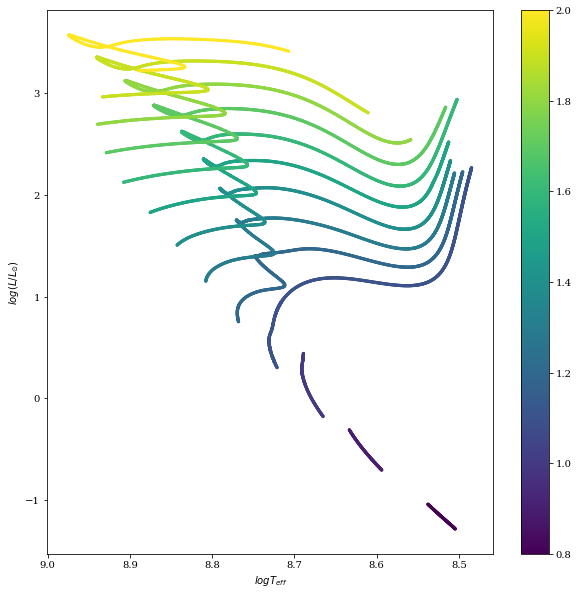

In [2]:
file='grid_0_0.csv'
small_grid=stellarGrid(file)
small_grid.buildIndex()
small_grid.popIndex(['','star_mass','star_age','star_feh',None,'star_MLT','effective_T','luminosity','delta_nu'])
small_grid.initialData(age_range=[1,8])
small_grid.plotHR1('ranged')

In [9]:
in_dex=['mass','age','feh','MLT']
out_dex=['L','Teff','delnu']
x_in=small_grid.fetchData('evo',in_dex)
y_out=small_grid.fetchData('evo',out_dex)
x_in, y_out=shuffleInputs(x_in,y_out)
m1=NNmodel('evo',in_dex, out_dex)
m1.buildModel([len(x_in),len(y_out)], 4, 256, reg=['l2',0.0001])
#m1.loadModel('SGM_enlarged.h5')

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 4)]               0         
_________________________________________________________________
dense_5 (Dense)              (None, 256)               1280      
_________________________________________________________________
dense_6 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_7 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_8 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_9 (Dense)              (None, 3)                 771       
Total params: 199,427
Trainable params: 199,427
Non-trainable params: 0
_____________________________________________________

In [10]:
m1.compileModel(0.0001,'MAE',metrics=['MAE','MSE'], beta_1=0.9999, beta_2=0.999)
m1.model.optimizer.get_config()

{'name': 'Nadam',
 'learning_rate': 0.0001,
 'decay': 0.004,
 'beta_1': 0.9999,
 'beta_2': 0.999,
 'epsilon': 1e-07}

In [11]:
#temporary fitting code
epoch_no=50000
class showProgress(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % int(epoch_no/100) == 0:
            percent= int(np.round((epoch/int(epoch_no/100)),0))
            time=datetime.now()
            time_lapsed = (time-start_time)
            print(str(percent)+'% | epoch='+str(epoch)+'/'+str(epoch_no)+' | now='+str(time)[:-7]+
                  ' | time lapsed='+str(time_lapsed)[:-7]+' | loss='+str(np.round(logs['loss'],5)))
logdir = "logs\\" + datetime.now().strftime("%Y%m%d-%H%M%S")
#logdir='logs'
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)
            
start_time=datetime.now()
m1.history=m1.model.fit(np.array(x_in).T,np.array(y_out).T,
                  epochs=epoch_no,
                  batch_size=len(x_in[0]),
                  validation_split=0.10,
                  verbose=0,
                  callbacks=[showProgress()])
print('training done! now='+str(datetime.now())+' | Time lapsed='+str(datetime.now()-start_time))
m1.model.save('SGM_enlarged_bigarch2.h5')

0% | epoch=0/50000 | now=2019-11-24 13:16:07 | time lapsed=0:00:04 | loss=2.10552
1% | epoch=500/50000 | now=2019-11-24 13:20:51 | time lapsed=0:04:47 | loss=0.19139
2% | epoch=1000/50000 | now=2019-11-24 13:25:40 | time lapsed=0:09:37 | loss=0.13863
3% | epoch=1500/50000 | now=2019-11-24 13:30:26 | time lapsed=0:14:23 | loss=0.11604
4% | epoch=2000/50000 | now=2019-11-24 13:35:14 | time lapsed=0:19:11 | loss=0.10228
5% | epoch=2500/50000 | now=2019-11-24 13:40:01 | time lapsed=0:23:58 | loss=0.09475
6% | epoch=3000/50000 | now=2019-11-24 13:44:57 | time lapsed=0:28:53 | loss=0.09067
7% | epoch=3500/50000 | now=2019-11-24 13:50:25 | time lapsed=0:34:21 | loss=0.08608
8% | epoch=4000/50000 | now=2019-11-24 13:55:38 | time lapsed=0:39:34 | loss=0.08282
9% | epoch=4500/50000 | now=2019-11-24 14:00:50 | time lapsed=0:44:47 | loss=0.08223
10% | epoch=5000/50000 | now=2019-11-24 14:06:31 | time lapsed=0:50:27 | loss=0.0781
11% | epoch=5500/50000 | now=2019-11-24 14:12:40 | time lapsed=0:56:3

95% | epoch=47500/50000 | now=2019-11-24 21:45:07 | time lapsed=8:29:03 | loss=0.02496
96% | epoch=48000/50000 | now=2019-11-24 21:49:55 | time lapsed=8:33:51 | loss=0.02452
97% | epoch=48500/50000 | now=2019-11-24 21:54:49 | time lapsed=8:38:45 | loss=0.02408
98% | epoch=49000/50000 | now=2019-11-24 21:59:48 | time lapsed=8:43:45 | loss=0.02363
99% | epoch=49500/50000 | now=2019-11-24 22:04:49 | time lapsed=8:48:45 | loss=0.0232
training done! now=2019-11-24 22:09:49.027075 | Time lapsed=8:53:45.498215


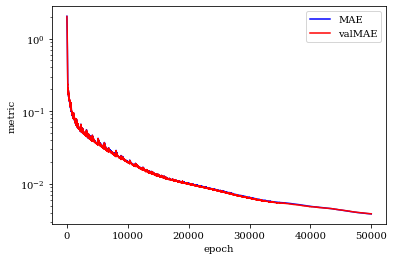

final loss = 0.0038456693
accuracy in dex = 
40814/1 - 2s
{'L': 0.013482073, 'Teff': 0.0033361895, 'delnu': 0.010146281}
evaluation results:
1700/1 - 0s - loss: 0.0218 - MAE: 0.0022 - MSE: 4.6652e-05
40814/1 - 2s


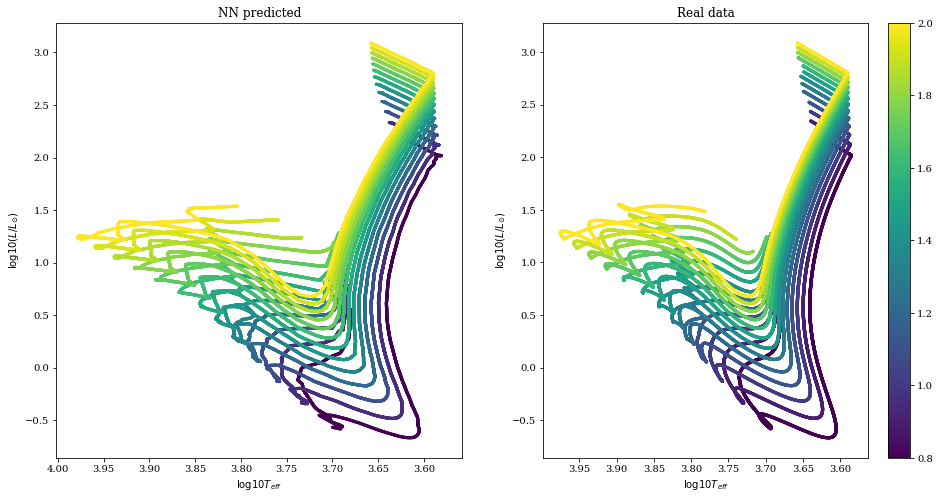

HR diagram saved as "small_grid_pics/HR23.png"
40814/1 - 2s


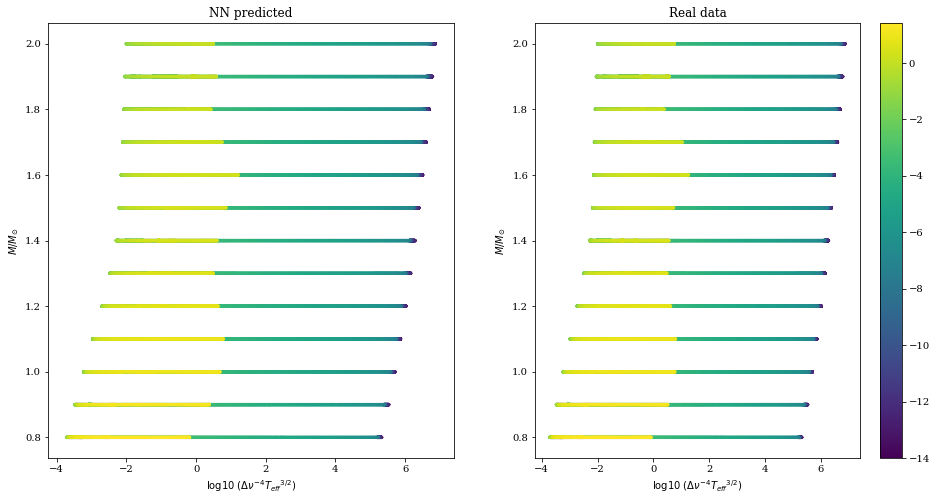

SR plot saved as "small_grid_pics/SR23.png"
40814/1 - 2s


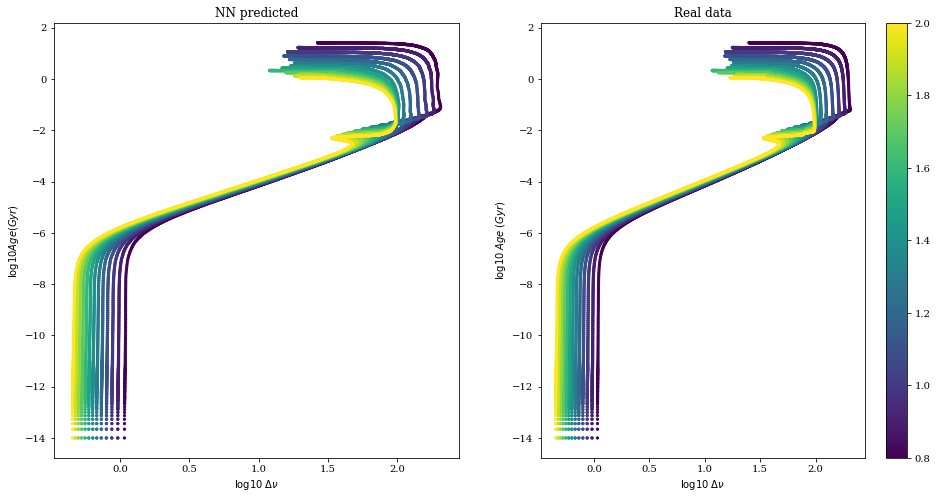

delnu vs age plot saved as "small_grid_pics/DelnuAge23.png"


In [12]:
m1.plotHist(plot_MSE=False)
print('final loss = '+str(m1.lastLoss('MAE')))
print('accuracy in dex = ')
print(m1.getDex(small_grid))
m1.evalData(small_grid, 7)
m1.plotHR(small_grid, None, savefile='small_grid_pics', trial_no=23)
m1.plotSR(small_grid, None, savefile='small_grid_pics', trial_no=23)
m1.plotDelnuAge(small_grid, None, savefile='small_grid_pics', trial_no=23)